# Homework 2 STA365 
Gabriel Mastromatteo

## Question 1

Show the sequential posterior distributions created as each observation is observed in a uniform distribution prior and a binomial likelihood.

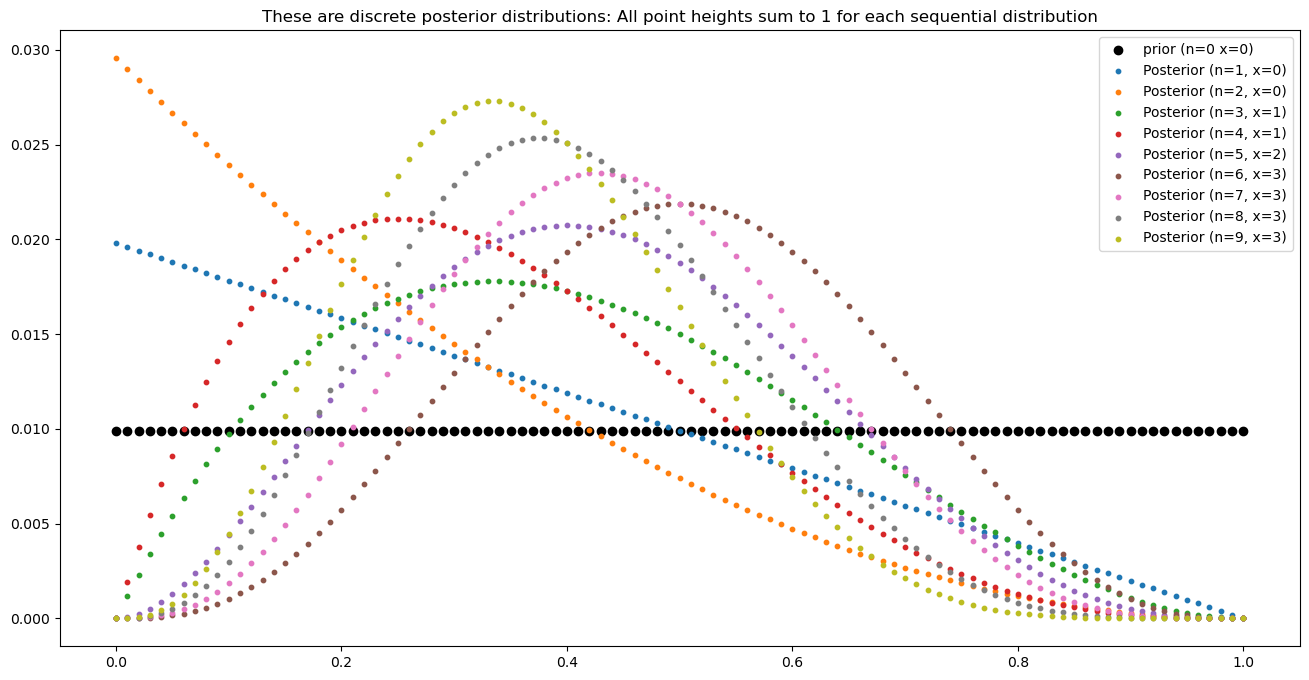

In [10]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # Use stats.bernoulli.pmf to calculate the likelihood for the current observation
    likelihood = stats.bernoulli.pmf(observation, parameter_domain)

    # Update the posterior
    posterior = prior * likelihood
    #print(posterior.sum())
    posterior /= posterior.sum()  # Normalize to sum to 1

    # Plot the updated posterior
    plt.scatter(
        parameter_domain,
        posterior,
        label=f"Posterior (n={n}, x={x})",
        s=10
    )

    # Update the prior for the next iteration
    prior = posterior
    
plt.legend();
plt.show('png')

#### Likelihood
$$
p(x \mid \theta, n) = \text{Binomial} \propto \theta^x (1 - \theta)^{n - x}
$$

#### Prior
Discrete:
$$
p(\theta) =
\begin{cases}
\frac{1}{101}, & \text{for } \theta = \frac{i}{100}, \, i = 0, 1, \dots, 100 \\
0, & \text{otherwise.}
\end{cases}
$$
Uniform.

#### Posterior
$$
p(\theta \mid x, n) = \frac{p(x \mid \theta, n) p(\theta)}{p(x)}
$$

Since $$p(x)$$ is a normalizing constant, we focus on:
$$
p(\theta \mid x, n) \propto p(x \mid \theta, n) p(\theta).
$$

Substituting:
$$
p(\theta \mid x, n) = \theta^x (1 - \theta)^{n - x} \cdot \frac{1}{101}.
$$

Since $$\frac{1}{101}$$ is a constant, this simplifies to:
$$
p(\theta \mid x, n) \propto \theta^x (1 - \theta)^{n - x}.
$$


### Why the Posterior is a Beta Distribution

1. **Functional Form:** The posterior distribution $$p(\theta \mid x, n)$$ is proportional to:
   $$p(\theta \mid x, n) \propto \theta^x (1 - \theta)^{n - x},$$
   which matches the Beta distribution:
   $$\text{Beta}(\alpha, \beta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}.$$
   By comparison, the posterior parameters are:
   $$\alpha = x + 1, \quad \beta = n - x + 1.$$

2. **Key Difference:** The **Binomial distribution** models the likelihood of observed data for a fixed $\theta$, while the **Beta distribution** models the posterior belief about $\theta$ as a random variable after observing data.

4. **Parameterization:** The posterior is:
   $$p(\theta \mid x, n) = \text{Beta}(x + 1, n - x + 1),$$
   where $$\alpha = x + 1$$ accounts for successes (plus one from the prior) and $$\beta = n - x + 1$$ accounts for failures (plus one from the prior).


## Question 2 

### Define Beta distribution 

The posterior distribution for $\theta_j\$ is:

$$
p(\theta_j | x_j^{(t)}, n_j^{(t)}) \propto \theta_j^{x_j^{(t)} + \alpha_j - 1} (1 - \theta_j)^{n_j^{(t)} - x_j^{(t)} + \beta_j - 1}.
$$

Since the Beta distribution is the conjugate prior to the Binomial likelihood, the posterior is:

$$
\theta_j \sim \text{Beta}(\alpha_j + x_j^{(t)}, \beta_j + n_j^{(t)} - x_j^{(t)}).
$$

The posterior distribution is a Beta distribution because the Beta distribution is the conjugate prior of the Binomial likelihood. This means the posterior distribution is also in the Beta family.


### Run Bayesian Bandit Algorithm

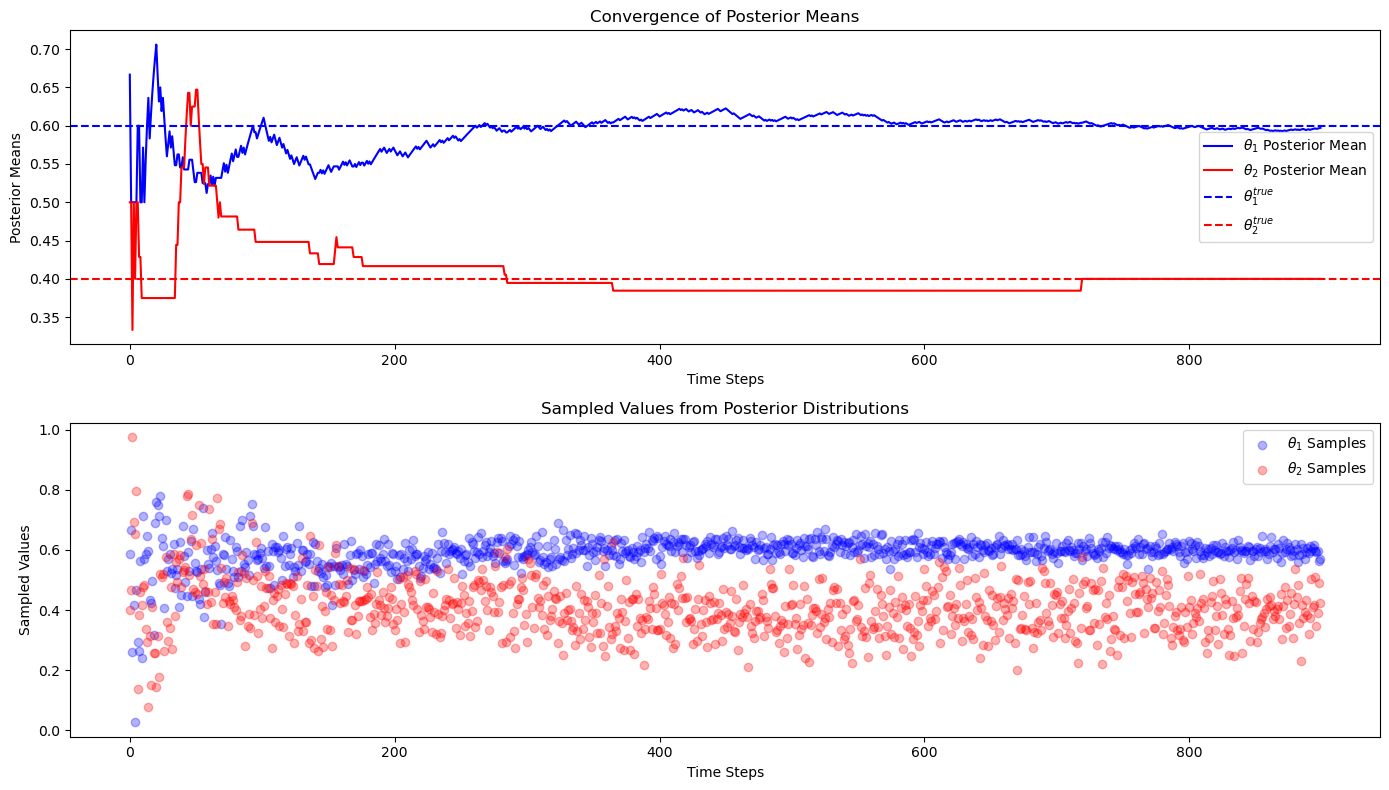

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the true success probabilities; to use for visualization process, not learning theta. 

theta_true_1 = 0.6
theta_true_2 = 0.4

# Prior parameters for Beta distributions; they are set to 1 which corresponds to a uniform prior between 0 and 1
alpha_1, beta_1 = 1, 1
alpha_2, beta_2 = 1, 1

# Number of iterations (time steps)
m = 900

# Storage for visualizations
posterior_means_1 = []
posterior_means_2 = []
theta_samples_1 = []
theta_samples_2 = []

# Simulate the Bayesian multi-armed bandit process
for t in range(m):
    # Sample from current posterior distributions
    sample_1 = np.random.beta(alpha_1, beta_1)
    sample_2 = np.random.beta(alpha_2, beta_2)

    # Store sampled values for visualization
    theta_samples_1.append(sample_1)
    theta_samples_2.append(sample_2)

    # Choose the arm with the higher sampled value (Thompson sampling)
    if sample_1 > sample_2:
        reward = np.random.rand() < theta_true_1  # Flip a coin with success probability theta_true_1
        alpha_1 += reward
        beta_1 += 1 - reward
    else:
        reward = np.random.rand() < theta_true_2  # Flip a coin with success probability theta_true_2
        alpha_2 += reward
        beta_2 += 1 - reward

    # Store posterior means for visualization
    posterior_means_1.append(alpha_1 / (alpha_1 + beta_1))
    posterior_means_2.append(alpha_2 / (alpha_2 + beta_2))

# Plot the results
plt.figure(figsize=(14, 8))

# Posterior means over time
plt.subplot(2, 1, 1)
plt.plot(posterior_means_1, label=r"$\theta_1$ Posterior Mean", color="blue")
plt.plot(posterior_means_2, label=r"$\theta_2$ Posterior Mean", color="red")
plt.axhline(theta_true_1, color="blue", linestyle="--", label=r"$\theta_1^{true}$")
plt.axhline(theta_true_2, color="red", linestyle="--", label=r"$\theta_2^{true}$")
plt.xlabel("Time Steps")
plt.ylabel("Posterior Means")
plt.title("Convergence of Posterior Means")
plt.legend()

# Posterior samples over time
plt.subplot(2, 1, 2)
plt.scatter(range(m), theta_samples_1, alpha=0.3, color="blue", label=r"$\theta_1$ Samples")
plt.scatter(range(m), theta_samples_2, alpha=0.3, color="red", label=r"$\theta_2$ Samples")
plt.xlabel("Time Steps")
plt.ylabel("Sampled Values")
plt.title("Sampled Values from Posterior Distributions")
plt.legend()

plt.tight_layout()
plt.show('png')


## Question 3 

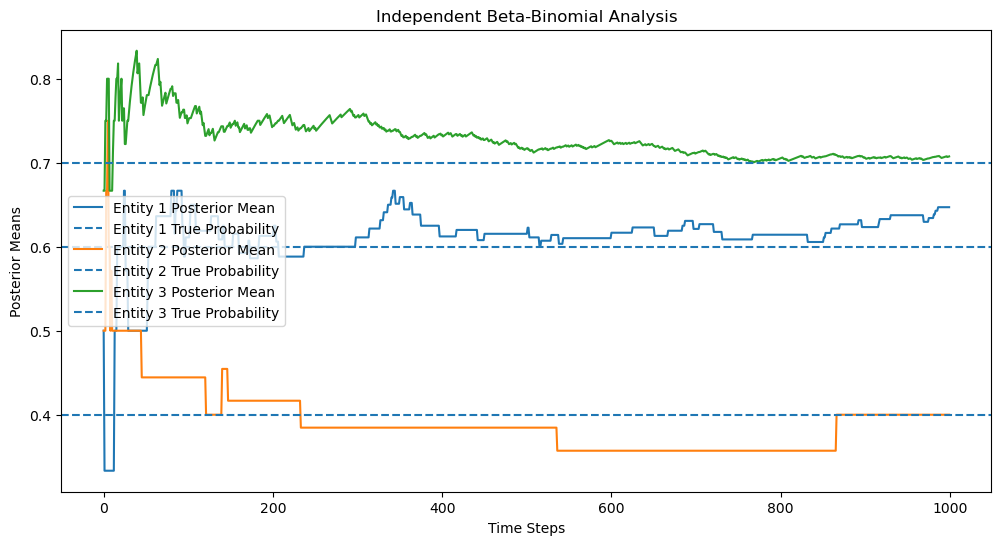

In [12]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Initialize true success probabilities for 3 entities
theta_true = [0.6, 0.4, 0.7]  # Replace with true probabilities as needed
num_entities = len(theta_true)  # Number of entities
m = 1000  # Number of iterations (time steps)

# Initialize prior parameters for Beta distributions (one per entity)
alpha = np.ones(num_entities)  # Success counts
beta_params = np.ones(num_entities)  # Failure counts

# Storage for visualization
posterior_means = np.zeros((m, num_entities))

# Simulate the Bayesian multi-armed bandit process
for t in range(m):
    # Sample from each entity's posterior
    sampled_theta = [np.random.beta(alpha[j], beta_params[j]) for j in range(num_entities)]

    # Select the entity with the highest sampled theta
    chosen_entity = np.argmax(sampled_theta)

    # Flip a coin for the chosen entity based on its true probability
    reward = np.random.rand() < theta_true[chosen_entity]

    # Update the chosen entity's Beta distribution parameters
    alpha[chosen_entity] += reward
    beta_params[chosen_entity] += 1 - reward

    # Store posterior means for visualization
    posterior_means[t] = alpha / (alpha + beta_params)

# Plot the posterior means over time
plt.figure(figsize=(12, 6))
for j in range(num_entities):
    plt.plot(posterior_means[:, j], label=f"Entity {j+1} Posterior Mean")
    plt.axhline(theta_true[j], linestyle="--", label=f"Entity {j+1} True Probability")
plt.xlabel("Time Steps")
plt.ylabel("Posterior Means")
plt.title("Independent Beta-Binomial Analysis")
plt.legend()
plt.show('png')


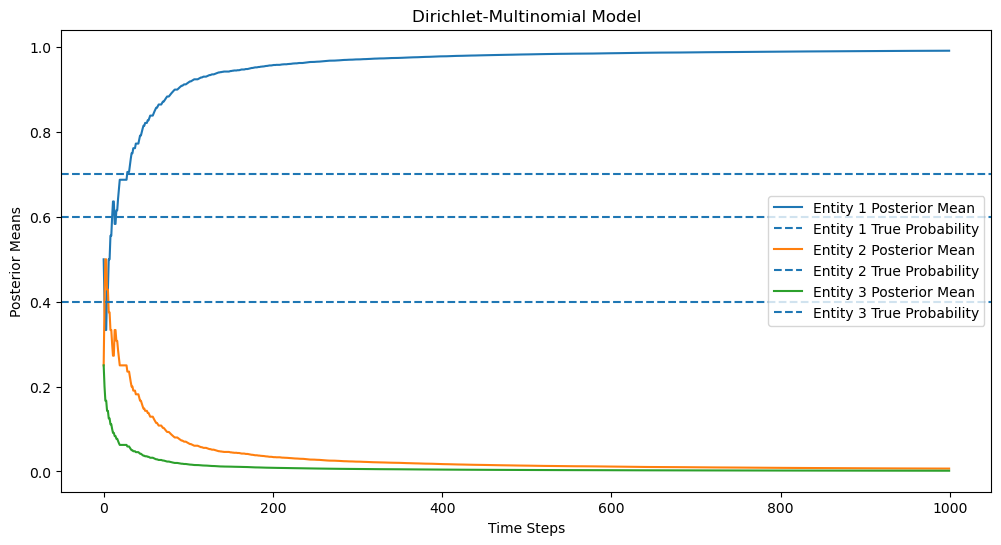

In [13]:
from scipy.stats import dirichlet

# Initialize true success probabilities for 3 entities
theta_true = [0.6, 0.4, 0.7]  # True probabilities
num_entities = len(theta_true)  # Number of entities
m = 1000 # Number of iterations (time steps)

# Initialize prior parameters for Dirichlet distribution
alpha_prior = np.ones(num_entities)  # Initial counts (all 1s)

# Storage for visualization
posterior_means_dirichlet = np.zeros((m, num_entities))

# Simulate the Bayesian multi-armed bandit process with Dirichlet prior
alpha_posterior = alpha_prior.copy()  # Start with the prior

for t in range(m):
    # Sample from the Dirichlet posterior
    sampled_thetas = np.random.dirichlet(alpha_posterior)

    # Select the entity with the highest sampled theta
    chosen_entity = np.argmax(sampled_thetas)

    # Flip a coin for the chosen entity based on its true probability
    reward = np.random.rand() < theta_true[chosen_entity]

    # Update the Dirichlet posterior
    alpha_posterior[chosen_entity] += reward

    # Store posterior means for visualization
    posterior_means_dirichlet[t] = alpha_posterior / np.sum(alpha_posterior)

# Plot the posterior means over time
plt.figure(figsize=(12, 6))
for j in range(num_entities):
    plt.plot(posterior_means_dirichlet[:, j], label=f"Entity {j+1} Posterior Mean")
    plt.axhline(theta_true[j], linestyle="--", label=f"Entity {j+1} True Probability")
plt.xlabel("Time Steps")
plt.ylabel("Posterior Means")
plt.title("Dirichlet-Multinomial Model")
plt.legend()
plt.show('png')


The Dirichlet-Multinomial model is designed to handle interdependent probabilities across multiple categories, ensuring that they sum to 1. While this global consistency is valuable in scenarios where such interdependence is crucial, in this specific case where the success and failure of each θ is independent it leads to convergence towards 1 for one θ and 0 for the other θ's, which only happend because it learns about one θ first an dthen has a major bias towards placing explinatory power for new data on that first θ. Leading to very inaccurate predictions of the true θ values.

On the other hand, the Beta-Binomial model treats each category's probability independently, allowing for more accurate adaptation to the true underlying probabilities. This flexibility makes it better suited for cases where success and failure probabilities for each category (θ) are independent, as it does not impose unnecessary interdependence between them.

In this specific case, the Beta-Binomial model is more appropriate because the success and failure probabilities for each θ are independent. The Dirichlet-Multinomial model inaccurately forces interdependence onto these probabilities, leading to inaccurate learning of the true probabilities.

### Use Case 

A financial-world example of deploying Bayesian multi-armed bandits is optimizing personalized credit card offers to maximize sign-ups. A bank testing three offers (A, B, and C) must balance exploration (learning customer preferences) and exploitation (maximizing sign-ups with the best offer) under a limited budget. Bayesian bandits dynamically allocate more resources to the best-performing offer based on updated posterior probabilities, ensuring efficient resource use and adaptability to changing customer preferences. This approach minimizes losses from ineffective offers, increases conversions, and provides valuable insights for future campaigns.